___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Freddy Dratwa

#### Victor Vazquez

#### Michel Haggiag

#### Allan Singer

#### Ricardo Ferraro

___

# Estudo do preço do carro

___

## A. INTRODUÇÃO

O objetivo deste projeto é chegar ao melhor modelo possível que seja capaz de prever o preço de um carro usado nos EUA a partir das características presentes no dataset:
    - Preço;
    - Ano;
    - Quilometragem;
    - Cidade;
    - Estado;
    - Marca;
    - Modelo;
    - Número de Chassis.

A base de dados possui 1.2 milhão de carros com data de produção entre os anos 1997 a 2018 de 58 marcas diferentes, sendo estes 2914 modelos distintos com o preço mÍnimo de US1.500,00 e máximo de US462.000,00 , com a mínima quilometragem 8 Km e a máxima 2.286.260,8 Km.<br>

Como uma primeira previsão, imagina-se que algumas das características do dataset influenciam mais no preço do carro do que outras. Por exemplo, é de se esperar que um carro comprado há mais tempo tenha seu preço menor atualmente. Ou seja, a variavel "Ano", que representa o ano em que o carro foi fabricado, deve influenciar muito no preço do veículo, bem como a quilometragem, onde um carro que foi comprado mas usado pouco deve permanecer mais barato do que um usado muitas vezes.<br>

Vale ressaltar também que, por se tratar de um grupo de 5 alunos, foi preciso buscar algum método para que todos pudessem trabalhar simultâneamente. Um site foi então descoberto, chamado cocalc em que este reproduzia o arquivo do jupyter em uma página em que todos podiam modificá-la ao mesmo tempo, o que facilitou muito a produção do trabalho. 

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [8]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

### BASE DE DADOS

**Limpando e tratando dataset**

Nas células abaixo, o dataset é limpo e reorganiazdo. Para se fazer isso, a coluna "Chassi" é removoida, pois esta é uma característica individual para cada veículo e não influencia no preço final do mesmo, acompanhada da variável "Estado", que é retirada pois a localização onde o carro é usado não altera seu preço após um certo período de tempo. Alem disso, duas colunas vazias foram reitradas. Então, a variável milhagem foi transformada em quilometragem, multplicando seu valor por 1.6. Por último, a variavel ano foi transformada em idade, ou seja, a diferença do ano atual (2019) para o ano em que o carro foi vendido. 

In [9]:
dataset = pd.read_csv("Dataframe.csv")

In [10]:
if "Vin" in dataset:
    dataset = dataset.drop(columns=["Vin", "Unnamed: 9", "Unnamed: 10", "Unnamed: 0"])
    dataset["Mileage"] = dataset["Mileage"].apply(lambda x: x*1.6)

    dataset.columns = ["ID","PRECO","ANO","KM","CIDADE","ESTADO","MARCA","MODELO"]
    dataset["IDADE"] = dataset["ANO"].apply(lambda x: 2019-x)

    dataset.ID = dataset.ID.astype("float")
    dataset.PRECO = dataset.PRECO.astype("float")
    dataset.ANO = dataset.ANO.astype("float")
    dataset.KM = dataset.KM.astype("float")
    dataset.IDADE = dataset.IDADE.astype("float")
    dataset.CIDADE = dataset.CIDADE.astype("category")
    dataset.ESTADO = dataset.ESTADO.astype("category")
    dataset.MARCA = dataset.MARCA.astype("category")
    dataset.MODELO = dataset.MODELO.astype("category")

    dataset["ESTADO"] = dataset["ESTADO"].apply(lambda x: x.upper())
    dataset["CIDADE"] = dataset["CIDADE"].apply(lambda x: x.upper())
    dataset["MARCA"] = dataset["MARCA"].apply(lambda x: x.upper())
    dataset = dataset[["ID","PRECO","ANO","IDADE","KM","CIDADE","ESTADO","MARCA","MODELO"]]

In [11]:
dataset.head()

,ID,PRECO,ANO,IDADE,KM,CIDADE,ESTADO,MARCA,MODELO
0,71314.0,30865.0,2015.0,4.0,31798.4,SALINAS,CA,DODGE,DurangoAWD
1,550011.0,16492.0,2015.0,4.0,48518.4,CLIVE,IA,CHRYSLER,200C
2,333281.0,20994.0,2014.0,5.0,31390.4,SINKING SPRING,PA,TOYOTA,RAV44X4
3,140986.0,29588.0,2014.0,5.0,36539.2,SARASOTA,FL,CADILLAC,SRXLuxury
4,415607.0,14980.0,2010.0,9.0,37772.8,SPRINGFIELD,PA,BUICK,LaCrosse4dr


## ANÁLISE DESCRITIVA

Nas celulas que seguem, ocorre a análise descritiva das variaveis, semelhante ao projeto 1. Em um primeiro momento, serão analisadas cada uma das variáveis. 

**Características da variável Preço**

In [12]:
dataset["PRECO"].describe()

count    100000.000000
mean      21112.148860
std       12937.887537
min        1500.000000
25%       12993.000000
50%       17999.000000
75%       26839.250000
max      368889.000000
Name: PRECO, dtype: float64

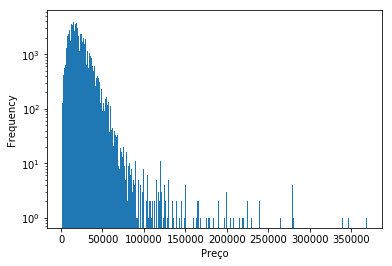

In [13]:
dataset["PRECO"].plot.hist(logy = True, bins = 500);
plt.xlabel("Preço");

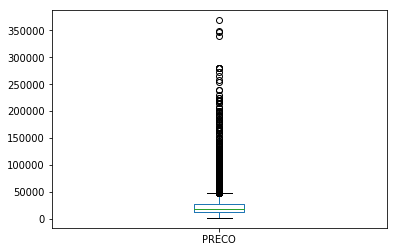

In [14]:
dataset["PRECO"].plot.box()
plt.show()

**Características da variável Idade**

In [15]:
dataset["IDADE"].describe()

count    100000.000000
mean          5.687830
std           3.429186
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          22.000000
Name: IDADE, dtype: float64

In [16]:
dataset["IDADE"].value_counts().head(5)

5.0    18322
4.0    18315
3.0    15541
2.0    11579
6.0     8678
Name: IDADE, dtype: int64

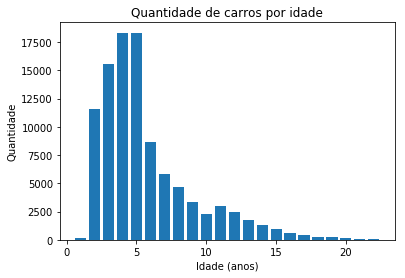

In [17]:
quantidade_por_idade = []
for i in range(22):
    quantidade_por_idade.append(len(dataset["IDADE"].loc[dataset["IDADE"] == i+1]))


plt.bar(np.arange(1,23,1), quantidade_por_idade)
plt.title("Quantidade de carros por idade")
plt.xlabel("Idade (anos)")
plt.ylabel("Quantidade")
plt.show()

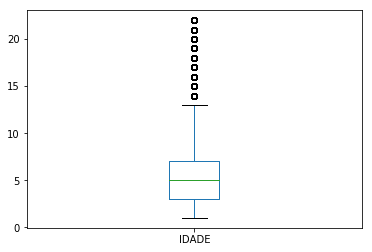

In [18]:
dataset["IDADE"].plot.box()
plt.show()

Análise:

A variável analisada idade, é a diferença entre o ano de hoje (2019), para o ano em que o carro foi fabricado. Após as plotagens do histograma e do boxplot, nota-se a grande maioria dos carros foi tem até 5 anos de idade, ou seja, a maioria deles são carros "jovens". Esta informação é confirmada pelo boxplot. Entretanto, existem alguns outliers, que ficam evidenciados em ambos os gráficos. Eles mostram que varios carros têm mais do que 5 anos de idade.

**Características da variável Km**

In [19]:
dataset["KM"].describe()

count    1.000000e+05
mean     8.436968e+04
std      6.586877e+04
min      8.000000e+00
25%      3.866680e+04
50%      6.483920e+04
75%      1.160308e+05
max      2.010592e+06
Name: KM, dtype: float64

(-10000, 400000)

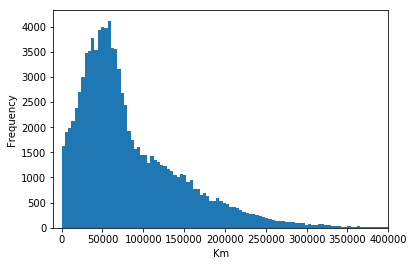

In [20]:
dataset["KM"].plot.hist(bins=500);
plt.xlabel("Km");
plt.xlim(-10000,400000)

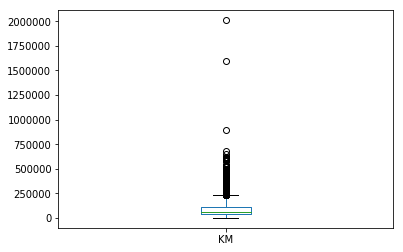

In [21]:
dataset["KM"].plot.box()
plt.show()

Análise:

A próxima variavel analisada é a quilometragem, ou seja, quantos quilometros os carros ja rodaram. Pelo fato de a maioria dos carros terem sido fabricados há menos de 10 anos, imagina-se que em sua maioria, os carros não tenham quilometragem alta. Esta hipótese é confirmada pelos gráficos. Com a plotagem do histograma e do boxplot, percebe-se que a maioria dos carros tem 50000 km rodados, sendo que existem alguns com mais e outros com menos. Este já é um número considerável mas, como pode se ver no boxplot, existem carros com mais de 3 milhões de km rodados. Assim, 50000 parece um numero pequeno. Tambem fica claro pelo boxplot que existe uma quantidade consideravel de outliers. Mesmo assim, a concentração maior se encontra nos 50000 km. 

**Característica da variável Marca**

In [22]:
dataset["MARCA"].describe()

count     100000
unique        57
top         FORD
freq       15626
Name: MARCA, dtype: object

In [23]:
dataset["MARCA"].value_counts().head(10)

FORD             15626
CHEVROLET        14339
HONDA             7259
NISSAN            6672
JEEP              5770
HYUNDAI           5090
DODGE             4825
GMC               4061
KIA               4056
MERCEDES-BENZ     3666
Name: MARCA, dtype: int64

Análise:

Como é de se imaginar, o preço de um veículo é muito afetado pela sua marca. Por exemplo, uma Ferrari será muito mais cara do que a grande maioria dos carros da ford, por exemplo. Além disso, nota-se a partir da análise dos value counts feitos que existem muito mais carros de marcas popuares, justamente por que são mais baratos. 

**Característica da variável Modelo**

In [24]:
dataset["MODELO"].describe()

count        100000
unique         2137
top       Silverado
freq           3428
Name: MODELO, dtype: object

In [25]:
dataset["MODELO"].value_counts().head(10)

Silverado    3428
Grand        2319
Sierra       1573
Altima2.5    1502
Accord       1389
F-1504WD     1314
Wrangler     1213
Civic        1120
3            1097
FusionSE      959
Name: MODELO, dtype: int64

Análise:

A variável analisada é o modelo do carro. O modelo usará esta para prever o preço do carro usando a seguinte lógica: se um modelo encontra-se entre os mais comprados, provavelmente significa que é um dos mais baratos, por que, geralmente os carros mais vendidos são aqueles mais baratos.

### ANÁLISE DESCRITIVA

(-10000, 500000)

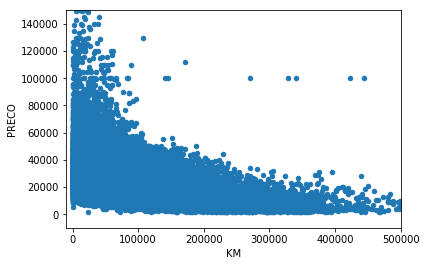

In [26]:
dataset.plot.scatter(y = "PRECO", x = "KM");
plt.ylim(-10000,150000)
plt.xlim(-10000,500000)

Analisando o gráfico Preço x Km, nota-se que o preço do veículo vai caindo conforme a quilometragem do mesmo aumenta, na maioria dos casos.

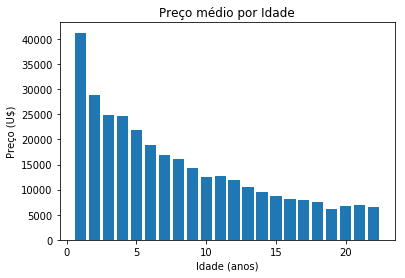

In [27]:
price_mean_by_year = []
for i in range(22):
    price_mean_by_year.append(dataset[dataset.IDADE == 1+i].PRECO.mean())
plt.bar(np.arange(1,23,1), price_mean_by_year)
plt.title("Preço médio por Idade")
plt.xlabel("Idade (anos)")
plt.ylabel("Preço (U$)")
plt.show()

Analisando o gráfico, é possível verificar que o preço dos carros diminui conforme o mesmo envelhece. Também é possível verificar que há queda mais efetiva no preço nos primeiros anos. 

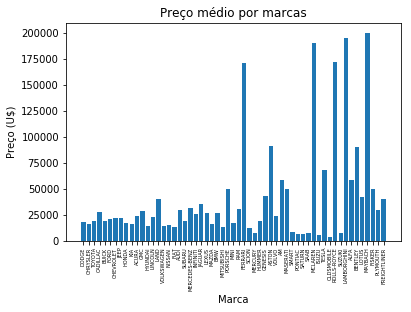

In [28]:
marcas = dataset["MARCA"].unique()

price_mean_by_marca = []
for i in marcas:
    price_mean_by_marca.append(dataset[dataset.MARCA == i].PRECO.mean())

plt.bar(marcas, price_mean_by_marca)
plt.xticks(rotation = 90, fontsize = 5)
plt.title("Preço médio por marcas")
plt.xlabel("Marca")
plt.ylabel("Preço (U$)")
plt.show()


O gráfico acima permite afirmar o que foi previsto na análise das informações do modelo do veículo. Como imaginado, o preço dos veículos aumenta conforme a marca. Por exemplo, as que têm os veículos mais caros são Rolss-Royce, Ferrari, Lambhorghini e Mercedes, justamente as marcas que esperava-se que teriam carros mais caros, por serem mais "famosas" por terem carros de alto nivel.

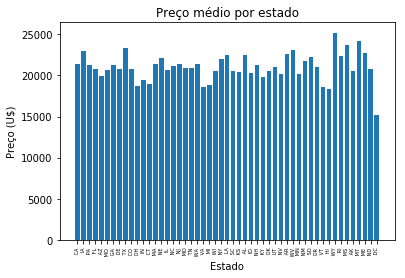

In [29]:
estados = dataset["ESTADO"].unique()

price_mean_by_estado = []
for i in estados:
    price_mean_by_estado.append(dataset[dataset.ESTADO == i].PRECO.mean())

plt.bar(estados, price_mean_by_estado)
plt.xticks(rotation = 90, fontsize = 5)
plt.title("Preço médio por estado")
plt.xlabel("Estado")
plt.ylabel("Preço (U$)")
plt.show()

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

**Separando a base de dados em treinamento e teste aleatoriamente**

In [30]:
train, test = train_test_split(dataset, test_size=0.25, train_size=0.75)
Y_train = train["PRECO"]
Y_test = test["PRECO"]

In [31]:
y_train = train["PRECO"].mean()
y_test = test["PRECO"].mean() # contem o preco previsto de um novo carro da base teste pelo moedelo de medias

In [32]:
rms_train = []
rms_test = []
num_train = []
dem_train = []
num_test = []
dem_test = []

trainpreco = train["PRECO"].tolist()
testpreco = test["PRECO"].tolist()

for a in trainpreco:
    rms_train.append((a-y_train)**2)
    num_train.append((a-y_train)**2)
    dem_train.append((a-y_train)**2)
for e in testpreco:
    rms_test.append((e-y_train)**2)
    num_test.append((e-y_train)**2)
    dem_test.append((e-y_test)**2)

RMS_train_M = np.sqrt(np.mean(rms_train))
RMS_test_M = np.sqrt(np.mean(rms_test))
R_train_M = 1-(sum(num_train)/sum(dem_train))
R_test_M = 1-(sum(num_test)/sum(dem_test))

In [33]:
R_train_M,RMS_train_M

(0.0, 12930.689225977136)

In [34]:
R_test_M, RMS_test_M

(-3.546237057916457e-05, 12959.257593706874)

In [35]:
R_perc_M = 0
RMS_perc_M = ((RMS_test_M-RMS_train_M)/RMS_train_M)*100

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [36]:
X_train = train
X_test = test

X_train = X_train.drop(columns = ["ID", "PRECO","ANO", "CIDADE", "ESTADO", "MARCA", "MODELO"])
X_test = X_test.drop(columns = ["ID", "PRECO","ANO", "CIDADE", "ESTADO", "MARCA", "MODELO"])

In [37]:
lista_erros = []
for k in range(1, 16):
    clf = KNeighborsRegressor(k)
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    lista_erros.append(mean_squared_error(Y_test,Y_pred))

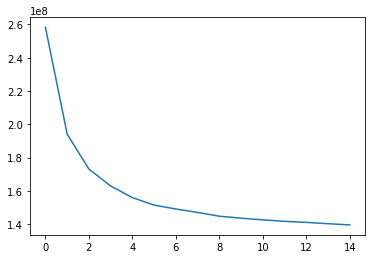

In [38]:
plt.plot(lista_erros);

In [39]:
clf = KNeighborsRegressor(8)
clf.fit(X_train,Y_train)
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

In [40]:
rms_train_K = []
rms_test_K = []
num_train_K = []
dem_train_K = []
num_test_K = []
dem_test_K = []


for a in range(len(trainpreco)):
    rms_train_K.append((trainpreco[a]-Y_pred_train[a])**2)
    num_train_K.append((trainpreco[a]-Y_pred_train[a])**2)
    dem_train_K.append((trainpreco[a]-y_train)**2)
for e in range(len(testpreco)):
    rms_test_K.append((testpreco[e]-Y_pred_test[e])**2)
    num_test_K.append((testpreco[e]-Y_pred_test[e])**2)
    dem_test_K.append((testpreco[e]-y_test)**2)

RMS_train_K = np.sqrt(np.mean(rms_train_K))
RMS_test_K = np.sqrt(np.mean(rms_test_K))
R_train_K = 1-(sum(num_train_K)/sum(dem_train_K))
R_test_K = 1-(sum(num_test_K)/sum(dem_test_K))

In [41]:
R_train_K, RMS_train_K

(0.3188593617937664, 10671.85879024847)

In [42]:
R_test_K, RMS_test_K

(0.12449596729252321, 12125.55141640376)

In [43]:
R_perc_K = ((R_test_K-R_train_K)/R_train_K)*100
RMS_perc_K = ((RMS_test_K-RMS_train_K)/RMS_train_K)*100

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

In [44]:
X_train = train
X_test = test

X_train = X_train.drop(columns = ["ID", "PRECO","ANO", "CIDADE", "ESTADO", "MARCA", "MODELO"])

X_test = X_test.drop(columns = ["ID", "PRECO","ANO", "CIDADE", "ESTADO", "MARCA", "MODELO"])

In [45]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train);

Y_pred_train = regressor.predict(X_train)

Y_pred_test = regressor.predict(X_test)

In [46]:
rms_train_A = []
rms_test_A = []
num_train_A = []
dem_train_A = []
num_test_A = []
dem_test_A = []

trainpreco = train["PRECO"].tolist()
testpreco = test["PRECO"].tolist()

for a in range(len(trainpreco)):
    rms_train_A.append((trainpreco[a]-Y_pred_train[a])**2)
    num_train_A.append((trainpreco[a]-Y_pred_train[a])**2)
    dem_train_A.append((trainpreco[a]-y_train)**2)
for e in range(len(testpreco)):
    rms_test_A.append((testpreco[e]-Y_pred_test[e])**2)
    num_test_A.append((testpreco[e]-Y_pred_test[e])**2)
    dem_test_A.append((testpreco[e]-y_test)**2)

RMS_train_A = np.sqrt(np.mean(rms_train_A))
RMS_test_A = np.sqrt(np.mean(rms_test_A))
R_train_A = 1-(sum(num_train_A)/sum(dem_train_A))
R_test_A = 1-(sum(num_test_A)/sum(dem_test_A))


R_perc_A = ((R_test_A-R_train_A)/R_train_A)*100
RMS_perc_A = ((RMS_test_A-RMS_train_A)/RMS_train_A)*100

In [47]:
R_train_A, RMS_train_A

(0.9328829451579328, 3349.948415569117)

In [48]:
R_test_A, RMS_test_A

(-0.4945014934080689, 15842.38629507906)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [49]:
def dummify(data, column_name):
    return pd.get_dummies(data[column_name],drop_first = False, prefix = column_name)

def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y, X_cp)
    results = model.fit()
    ypred = results.predict(X_cp)
    return results, ypred

In [50]:
traindummy = pd.concat([dummify(dataset, "ESTADO").dropna(), dummify(dataset, "MODELO").dropna(), dummify(dataset, "MARCA").dropna()], axis=1)
dt = dataset.drop(columns = ["ID", "ANO", "CIDADE", "ESTADO", "MARCA", "MODELO"])
final = pd.concat([dt, traindummy], axis = 1)

In [51]:
train, test = train_test_split(final, test_size = 0.25, train_size = 0.75)

In [52]:
df = train

x = df[np.delete(df.columns.values, 0)]
y = df[["PRECO"]]

results = regress(x,y)

dataresultados = pd.read_html(results[0].summary().tables[1].as_html(), header=0, index_col=0)[0]

In [53]:
results[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRECO   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     235.7
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        19:24:29   Log-Likelihood:            -7.3876e+05
No. Observations:               75000   AIC:                         1.482e+06
Df Residuals:                   72891   BIC:                         1.501e+06
Df Model:                        2108                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         5.205e+04    212.004    245.514      0.000    5.16e+04    5.25e+04
IDADE                        -1406.1128     10.401   -135.193      0.000   -1426.498   -1385.727
KM                              -0.0463      0.000   -101.156      0.000      -0.047      -0.045
ESTADO_ AK                     181.9063    394.721      0.461      0.645    -591.745     955.558
ESTADO_ AL                    1288.4294    156.667      8.224      0.000     981.363    1595.496
ESTADO_ AR                    1781.5000    210.746      8.453      0.000    1368.439    2194.561
ESTADO_ AZ                     557.0754    128.183      4.346      0.000     305.838     808.313
ESTADO_ CA                     707.3319     95.171      7.432      0.000     520.798     893.866
ESTADO_ CO                    1572.6577    130.066     12.091      0.000    1317.729    1827.587
ESTADO_ CT                     358.7982    172.362      2.082      0.037      20.969     696.627
ESTADO_ DC                    1587.9901   3482.072      0.456      0.648   -5236.860    8412.840
ESTADO_ DE                     831.8493    316.623      2.627      0.009     211.270    1452.429
ESTADO_ FL                    -193.7229     95.056     -2.038      0.042    -380.033      -7.413
ESTADO_ GA                     544.6117    109.042      4.995      0.000     330.890     758.333
ESTADO_ HI                    1310.2651    332.852      3.936      0.000     657.877    1962.653
ESTADO_ IA                    1699.6487    237.523      7.156      0.000    1234.105    2165.193
ESTADO_ ID                    1413.7559    277.229      5.100      0.000     870.389    1957.123
ESTADO_ IL                     765.7871    109.915      6.967      0.000     550.354     981.221
ESTADO_ IN                     732.1120    142.333      5.144      0.000     453.140    1011.084
ESTADO_ KS                     805.5915    193.801      4.157      0.000     425.742    1185.441
ESTADO_ KY                     187.2936    151.554      1.236      0.217    -109.752     484.339
ESTADO_ LA                     783.1396    194.323      4.030      0.000     402.267    1164.012
ESTADO_ MA                     592.8098    138.853      4.269      0.000     320.658     864.962
ESTADO_ MD                     394.4192    140.715      2.803      0.005     118.619     670.220
ESTADO_ ME                     549.5991    396.611      1.386      0.166    -227.758    1326.956
ESTADO_ MI                     336.0609    162.680      2.066      0.039      17.208     654.913
ESTADO_ MN                    1362.1035    163.464      8.333      0.000    1041.714    1682.493
ESTADO_ MO                     908.0384    142.255      6.383      0.000     629.219    1186.858
ESTADO_ MS                    1661.4507    215.723      7.702      0.000    

In [54]:
print(len(dataresultados), len(df))

Pelo fato de a base de dados deste modelo possuir mais 2000 colunas e 100 mil linhas, o método mais correto de aplicação de regressão se tornou praticamente inviável uma vez que seria necessário pelo menos 17h para o código rodar. Assim, o código utilizado para se obter a regressão faz o processo de excluir as variáveis com valor-p maior que alpha e executar a função regress por apenas cinco vezes. O correto seria eliminar a variável com valor-p maior que alpha e executar a função regress e repetir o processo excluindo uma por uma as variáveis que não são uteis para o modelo.

In [55]:
for i in range(5):
    maiores = []
    for i in dataresultados.loc[(dataresultados["P>|t|"] > 0.10)].index.tolist():
        maiores.append(i)

    df = df.drop(columns = maiores)
    x = df[np.delete(df.columns.values, 0)]
    y = df[["PRECO"]]
    results = regress(x,y)
    dataresultados = pd.read_html(results[0].summary().tables[1].as_html(), header=0, index_col=0)[0]

2248 75000


In [56]:
print(len(dataresultados), len(df))

1491 75000


In [57]:
results[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRECO   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     343.3
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        19:29:05   Log-Likelihood:            -7.3918e+05
No. Observations:               75000   AIC:                         1.481e+06
Df Residuals:                   73557   BIC:                         1.495e+06
Df Model:                        1442                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         5.167e+04    204.072    253.203      0.000    5.13e+04    5.21e+04
IDADE                        -1398.1015      9.686   -144.343      0.000   -1417.086   -1379.117
KM                              -0.0462      0.000   -102.800      0.000      -0.047      -0.045
ESTADO_ AL                     901.6922    144.068      6.259      0.000     619.320    1184.065
ESTADO_ AR                    1344.3053    203.196      6.616      0.000     946.043    1742.568
ESTADO_ CA                     312.3070     68.283      4.574      0.000     178.473     446.141
ESTADO_ CO                    1207.5318    112.973     10.689      0.000     986.105    1428.959
ESTADO_ FL                    -586.7322     68.139     -8.611      0.000    -720.284    -453.180
ESTADO_ GA                     151.8064     87.279      1.739      0.082     -19.261     322.873
ESTADO_ HI                     910.8360    329.856      2.761      0.006     264.319    1557.353
ESTADO_ IA                    1328.0188    232.307      5.717      0.000     872.698    1783.339
ESTADO_ ID                    1044.4051    273.311      3.821      0.000     508.717    1580.093
ESTADO_ IL                     385.0067     88.744      4.338      0.000     211.069     558.945
ESTADO_ IN                     356.2200    127.521      2.793      0.005     106.279     606.161
ESTADO_ KS                     447.3236    184.817      2.420      0.016      85.084     809.564
ESTADO_ LA                     418.3353    185.799      2.252      0.024      54.171     782.500
ESTADO_ MA                     217.6264    123.407      1.763      0.078     -24.250     459.503
ESTADO_ MN                     988.1194    151.618      6.517      0.000     690.949    1285.290
ESTADO_ MO                     511.4489    127.660      4.006      0.000     261.237     761.661
ESTADO_ MS                    1250.2824    208.781      5.988      0.000     841.073    1659.492
ESTADO_ MT                    2741.0824    359.062      7.634      0.000    2037.323    3444.842
ESTADO_ NC                     654.7597     89.418      7.322      0.000     479.501     830.019
ESTADO_ NE                    1074.9480    222.135      4.839      0.000     639.564    1510.332
ESTADO_ NH                     623.8351    217.638      2.866      0.004     197.266    1050.404
ESTADO_ NM                    1670.7157    238.055      7.018      0.000    1204.128    2137.303
ESTADO_ NV                     559.5971    191.265      2.926      0.003     184.718     934.476
ESTADO_ OK                     326.0401    156.697      2.081      0.037      18.914     633.166
ESTADO_ OR                    1485.5431    164.197      9.047      0.000    1163.718    1807.369
ESTADO_ PA                     525.3701    102.532      5.124      0.000    

In [58]:
quanti = 0
for i in dataresultados["P>|t|"]:
    if i > 0.10:
        quanti+=1
print("Quantidade de colunas com P>|t| maiores que alpha de 10%: ", quanti)

Quantidade de colunas com P>|t| maiores que alpha de 10%:  6



### Análise da primeira versão da regressão linear "Train":


O coeficiente de determinação 𝑅-squared é uma medida que representa o quão bem o modelo é capaz de captar a variabilidade dos dados. Para esta medida, quanto mais próximo de 1, melhor a percepção de variabilidade do modelo. Com isso em mente, o valor inicial de 0.862 obtido a partir da regressão é satisfatório e indica que o modelo consegue de fato perceber a variabilidade nos dados. 

Existe no entanto, uma imprecisão na medida R-Squared que é agravada em modelos que contém um número elevado de variáveis não explicativas. Uma alternativa para esta medida é a R-Squared ajustada que compensa as variáveis não explicativas no modelo fornecendo um valor mais realista. O valor de R-squared ajustado fornecido pela regressão do modelo foi 0.859 o que continua sendo um valor alto confirmando a captação de variabilidade do modelo. 

A probabilidade estatística F, dada pelo valor Prob(F-statistic) é uma medida que indica a presença ou não de variáveis explicativas que contribuem significantemente para o modelo. A Prob(F-statistic) gerada pela regressão é igual a zero, o que confirma a presença de variáveis explicativas que contribuem para o modelo. 

Com o intuito de verificar a normalidade dos resíduos do modelo, é necessário analisar outros dois testes, sendo eles o Omnibus, dado por Prob(Omnibus) e Jarque-Bere (Prob(JB)). O resultado obtido pelo teste Omnibus foi muito próximo de zero, o que indica que os resíduos do modelo "Train" não são distribuidos normalmente, violando a suposição inicial e comprometendo a regressão como um todo. O teste Jarque-Bere, confirma o que havia sido observado pelo Omnibus, ou seja, não há normalidade entre os resíduos, dado o valor próximo de zero de Prob(JB).

### TEST

In [59]:
for i in test.columns.tolist():
    if i not in df.columns.tolist():
        test = test.drop(columns = [i])

In [60]:
test.head()

,PRECO,IDADE,KM,ESTADO_ AL,ESTADO_ AR,ESTADO_ CA,ESTADO_ CO,ESTADO_ FL,ESTADO_ GA,ESTADO_ HI,...,MARCA_SAAB,MARCA_SATURN,MARCA_SCION,MARCA_SUBARU,MARCA_SUZUKI,MARCA_TESLA,MARCA_TOYOTA,MARCA_VOLKSWAGEN,MARCA_VOLVO,MARCA_SMART
44330,6888.0,5.0,72787.2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
62558,16980.0,2.0,10388.8,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3290,17000.0,4.0,28465.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91665,12900.0,5.0,97108.8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7142,17995.0,3.0,20440.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
X_Test = sm.add_constant(test[np.delete(test.columns.values, 0)])
Y_pred_test = results[0].predict(X_Test).tolist()

In [62]:
rms_test_R = []
rms_train_R = []

testpreco = test["PRECO"].tolist()
trainpreco = train["PRECO"].tolist()

Y_pred_train = results[1].tolist()
Y_pred_test = results[0].predict(X_Test).tolist()


for a in range(len(trainpreco)):
    rms_train_R.append((trainpreco[a]-Y_pred_train[a])**2)

for e in range(len(testpreco)):
    rms_test_R.append((testpreco[e]-Y_pred_test[e])**2)


RMS_train_R = np.sqrt(np.mean(rms_train_R))
RMS_test_R = np.sqrt(np.mean(rms_test_R))
R_train_R = results[0].rsquared
R_test_R = r2_score(testpreco, Y_pred_test)

R_perc_R = ((R_test_R-R_train_R)/R_train_R)*100
RMS_perc_R = ((RMS_test_R-RMS_train_R)/RMS_train_R)*100

In [63]:
R_train_R, RMS_train_R

(0.8706320795620286, 4613.943556567114)

In [64]:
R_test_R, RMS_test_R

(0.8368350404837129, 5356.9391248652455)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

In [65]:
predicoes = ["Media", "K-NN", "Regressão", "Árvore de Decisão"]
R_TRAIN = [R_train_M, R_train_K, R_train_R, R_train_A]
R_TEST = [R_test_M, R_test_K, R_test_R, R_test_A]
R_PERC = [R_perc_M, R_perc_K, R_perc_R, R_perc_A]
RMS_TRAIN = [RMS_train_M, RMS_train_K, RMS_train_R, RMS_train_A]
RMS_TEST = [RMS_test_M, RMS_test_K, RMS_test_R, RMS_test_A]
RMS_PERC = [RMS_perc_M, RMS_perc_K, RMS_perc_R, RMS_perc_A]
PREDI = pd.DataFrame(data = predicoes)
PREDI.columns = ["Modelo"]
PREDI["R² Treinamento"] = R_TRAIN
PREDI["R² Teste"] = R_TEST
PREDI["R² %"] = R_PERC
PREDI["RMS Treinamento"] = RMS_TRAIN
PREDI["RMS Teste"] = RMS_TEST
PREDI["RMS %"] = RMS_PERC

In [66]:
PREDI

,Modelo,R² Treinamento,R² Teste,R² %,RMS Treinamento,RMS Teste,RMS %
0,Media,0.000000,-0.000035,0.000000,12930.689226,12959.257594,0.220935
1,K-NN,0.318859,0.124496,-60.955838,10671.858790,12125.551416,13.621738
2,Regressão,0.870632,0.836835,-3.881897,4613.943557,5356.939125,16.103265
3,Árvore de Decisão,0.932883,-0.494501,-153.007882,3349.948416,15842.386295,372.914336


___
## E. CONCLUSÃO

### Explicação dos valores obtido 

As medidas calculadas acima representam o R² e o RMS. Estas foram calculadas tanto para a base de treinamento quanto para de teste. Sabe-se que, a primeira medida é o chamado "Coeficiente de determinação" e representa o quadrado da correlação entre o valor previsto e o real. Assim, quanto maior seu valor, melhor é o modelo. Já o segundo valor é a raiz do erro médio quadrático e quanto menor seu valor, melhor é o modelo. 

Além disso, é interessante entender qual dos R² e RMS serão usados para concluir qual modelo é melhor, entre os de treinamento
e os de teste. O que será usado de fato é o de teste. Entretanto, é interessante compará-lo com o de treinamento, pois uma maior semelhança entre os valores indica que o modelo aprendeu bem com a base de treinamento e aplicou bem o que foi aprendido à base de teste.

### Análise por Modelo

Tendo em mente o que foi explicado acima, uma tabela foi criada, organizando os valores de R² e RMS para cada modelo de modo a facilitar a análise de cada um e a conclusão de qual é mais eficiente. Em geral, nota-se que os modelos tiveram erro quadrático médio bastante alto. Além disso, o coeficiente R² indica que os modelos não se ajustaram muito bem. Uma análise individual permitirá concluir qual o melhor, apesar de nenhum ser excelente.  

O primeiro modelo usado foi o modelo de predição pela média. Logo de cara, nota-se que os valores de treinamento e teste para para R² e RMS foram semelhantes. À partir disso, conclui-se que o modelo aprendeu bem com a base de testes. Entretanto, rapidamente se conclui que este modelo não é efetivo. Esta afirmação se dá pelo fato de o valor de R² (-0.000012) é extremamente baixo, além do de RMS (12967.107327) é extremamente alto. 

Depois deste, o modelo usado foi "K VIZINHOS MAIS PRÓXIMOS" (K-Nearest Neighbors Regression). Este já se apresentou melhor que o anterior, tendo valor de R² maior (0.133040) e de RMS sutilmente menor (12073.692028). Apesar de já apresentar uma melhora considerável, não era o melhor modelo possível. Além disso, os valores de treinamento e teste apresentam certa discrepância, o que indica que o modelo de teste não aprendeu tão bem com o teste. 

Então, utilizou-se o modelo de Regressão Linear. Enfim, uma melhora significativa apareceu. O valor de R² aumentou aproximadamente 8 vezes (0.849500) e o de RMS  caiu quase que pela metade (5072.992471). Assim como o primeiro modelo, este teve valores parecidos para teste e treinamento, ou seja, novamente  modelo aprendeu bem com a base de teste.

Por último, usou-se o modelo de Árvore de Decisão> este mostrrou-se menos eficiente que o anterior, tendo um valor R² menor 	(-0.494501) e de RMS maior (15842.386295). Além disso, este foi o modelo que mais apresentou diferenças entre as bases de teste e treinamento. Então, um motivo pelo qual o modelo não é tão bom pode ser justamente o fato deste não ter aprendido bem com a a base de treinamento. 




### Conclusão Final

Dito tudo isso, conclui-se, por fim que o modelo que apresentou melhor eficiência e portanto é o melhor é o de Regressão Linear, pois tem valor alto de R² e baixo de RMS, quando comparado aos outros. Este fato pode ser explicado pelo fato de da base de treinamento ter aprendido bem com a de teste, o que fica claro qauando comparados os valores destes. 

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS

https://scholar.google.com.br/.

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

https://educationalresearchtechniques.com/2018/11/02/k-nearest-neighbor-regression-with-python/

https://medium.com/data-py-blog/decision-tree-regression-in-python-b185a3c63f2b

https://towardsdatascience.com/random-forests-and-decision-trees-from-scratch-in-python-3e4fa5ae4249